<div class="alert alert-info">
<h1><center><font color=darkblue>Predicción De Enfermedades Cardíacas Mediante Técnicas De Machine Learning.<font></center>
<h2><center><font color=darkblue>Heart Disease Prediction Using Machine Learning.<font></center>
</h1>
</div>



<center>
    <img src="https://dvl2h13awlxkt.cloudfront.net/assets/general-images/Knowledge/_1200x630_crop_center-center_82_none/Coronary-heart-disease.jpg?mtime=1657262027" alt="Ejemplo de imagen" width="300">>
</center>


----------------------------
# <font color=RoyalBlue>Table of Contents<font>

> - [1 - Introducción  📚](#1)
> - [2 - Comprensión del Negocio (Business Understanding) 🔎](#2)



---------------------------------------
<!-- 1. Introducción 📚 -->
<a class="anchor"  id="1"></a>
# <font color=RoyalBlue>1- Introducción 📚</font>

En un mundo donde las enfermedades cardíacas son una de las principales causas de morbilidad y mortalidad, la aplicación de técnicas de machine learning se presenta como un aliado revolucionario en la detección temprana y la toma de decisiones informadas. Este proyecto tiene como objetivo utilizar datos detallados de IEEE Dataport sobre enfermedades cardíacas para desarrollar un modelo predictivo capaz de evaluar el riesgo cardíaco de un individuo.

## <font color=RoyalBlue>Data:<font>

### <font color=CornflowerBlue>Source:<font>
    
Este conjunto de datos sobre enfermedades cardíacas se ha creado combinando 5 conjuntos de datos populares sobre enfermedades cardíacas que ya estaban disponibles de forma independiente pero que no se habían combinado antes. En este conjunto de datos, se combinan 5 conjuntos de datos sobre cardiopatías con 11 características comunes, lo que lo convierte en el mayor conjunto de datos sobre enfermedades cardíacas disponible hasta la fecha para fines de investigación. Los cinco conjuntos de datos utilizados son:

- 1. Cleveland
- 2. Hungarian
- 3. Switzerland
- 4. Long Beach VA
- 5. Statlog (Heart) Data Set.
    
    
Manu Siddhartha. (2020). Heart Disease Dataset (Comprehensive). IEEE Dataport. https://dx.doi.org/10.21227/dz4t-cm36

<center>
    <img src="https://ieee-dataport.org/sites/default/files/heart.PNG" alt="Ejemplo de imagen" width="250"
</center>

## Descripción:

- **Age:** edad del paciente [años]
- **Sex:** sexo del paciente [1: Hombre, 0: Mujer].
- **ChestPainType:** tipo de dolor torácico [1: Angina típica, 2: Angina atípica, 3: Dolor no anginoso, 4: Asintomático].
- **RestingBP:** presión arterial en reposo [mm Hg].
- **Cholesterol:** colesterol sérico [mm/dl].
- **FastingBS:** glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
- **RestingECG:** resultados del electrocardiograma en reposo [0: Normal, 1: con anomalía de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), 2: con hipertrofia ventricular izquierda probable o definida según los criterios de Estes].
- **Max_heart_rate:** frecuencia cardiaca máxima alcanzada [Valor numérico entre 60 y 202].
- **Exercise_angina:** angina inducida por el ejercicio [1: sí, 0: no].
- **Oldpeak:** oldpeak = [Valor numérico 0 - 6] Depresión del ST inducida por el ejercicio en relación con descanso.
- **ST_Slope:** la pendiente del segmento ST máximo del ejercicio [1: pendiente ascendente, 2: plano, 3: pendiente descendente].
- **Target(HeartDisease):** clase de salida [1: cardiopatía, 0: no presenta enfermedad cardiaca].

-------------------
<!-- 2. Comprensión del Negocio (Business Understanding) 🔎 -->
<a class="anchor"  id="2"></a>
# <font color=RoyalBlue>2- Comprensión del Negocio (Business Understanding) 🔎</font>

## Objetivo del Proyecto:
El objetivo principal es construir un modelo de machine learning que pueda predecir la presencia o ausencia de enfermedades cardíacas en pacientes basándose en una serie de características clínicas y de salud proporcionadas en la base de datos. Este modelo no solo ayudará en la identificación temprana de riesgos cardiovasculares, sino que también proporcionará información valiosa para la toma de decisiones médicas.

-----------------------------------------
<!-- 3. Comprensión de los Datos (Data Understanding) 📊 -->
<a class="anchor"  id="3"></a>
# <font color=RoyalBlue>3- Comprensión de los Datos (Data Understanding) 📊</font>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.mlab as mlab
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EdwinEscobedo/Datasets/refs/heads/main/heart_statlog_cleveland_hungary_final.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
# Diccionario con los nuevos nombres de las columnas
nuevos_nombres = {
    'age': 'Age',
    'sex': 'Sex',
    'chest pain type': 'ChestPainType',
    'resting bp s': 'RestingBP',
    'cholesterol': 'Cholesterol',
    'fasting blood sugar': 'FastingBS',
    'resting ecg': 'RestingECG',
    'max heart rate': 'Max_heart_rate',
    'exercise angina': 'Exercise_angina',
    'oldpeak': 'Oldpeak',
    'ST slope': 'ST_Slope',
    'target': 'Target(HeartDisease)'
}

# Renombrar las columnas del DataFrame
df.rename(columns=nuevos_nombres, inplace=True)

# Mostrar el DataFrame con los nuevos nombres de las columnas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,Max_heart_rate,Exercise_angina,Oldpeak,ST_Slope,Target(HeartDisease)
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
raw_shape = df.shape
raw_shape

(1190, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1190 non-null   int64  
 1   Sex                   1190 non-null   int64  
 2   ChestPainType         1190 non-null   int64  
 3   RestingBP             1190 non-null   int64  
 4   Cholesterol           1190 non-null   int64  
 5   FastingBS             1190 non-null   int64  
 6   RestingECG            1190 non-null   int64  
 7   Max_heart_rate        1190 non-null   int64  
 8   Exercise_angina       1190 non-null   int64  
 9   Oldpeak               1190 non-null   float64
 10  ST_Slope              1190 non-null   int64  
 11  Target(HeartDisease)  1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


## **Exploratory Data Analysis (EDA)**

- **Age:** edad del paciente [años]
- **Sex:** sexo del paciente [1: Hombre, 0: Mujer].
- **ChestPainType:** tipo de dolor torácico [1: Angina típica, 2: Angina atípica, 3: Dolor no anginoso, 4: Asintomático].
- **RestingBP:** presión arterial en reposo [mm Hg].
- **Cholesterol:** colesterol sérico [mm/dl].
- **FastingBS:** glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
- **RestingECG:** resultados del electrocardiograma en reposo [0: Normal, 1: con anomalía de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), 2: con hipertrofia ventricular izquierda probable o definida según los criterios de Estes].
- **Max_heart_rate:** frecuencia cardiaca máxima alcanzada [Valor numérico entre 60 y 202].
- **Exercise_angina:** angina inducida por el ejercicio [1: sí, 0: no].
- **Oldpeak:** oldpeak = [Valor numérico 0 - 6] Depresión del ST inducida por el ejercicio en relación con descanso.
- **ST_Slope:** la pendiente del segmento ST máximo del ejercicio [1: pendiente ascendente, 2: plano, 3: pendiente descendente].
- **Target(HeartDisease):** clase de salida [1: cardiopatía, 0: normal].

### **Analizar nulos**

Tamaño del dataset: 14280


<Axes: >

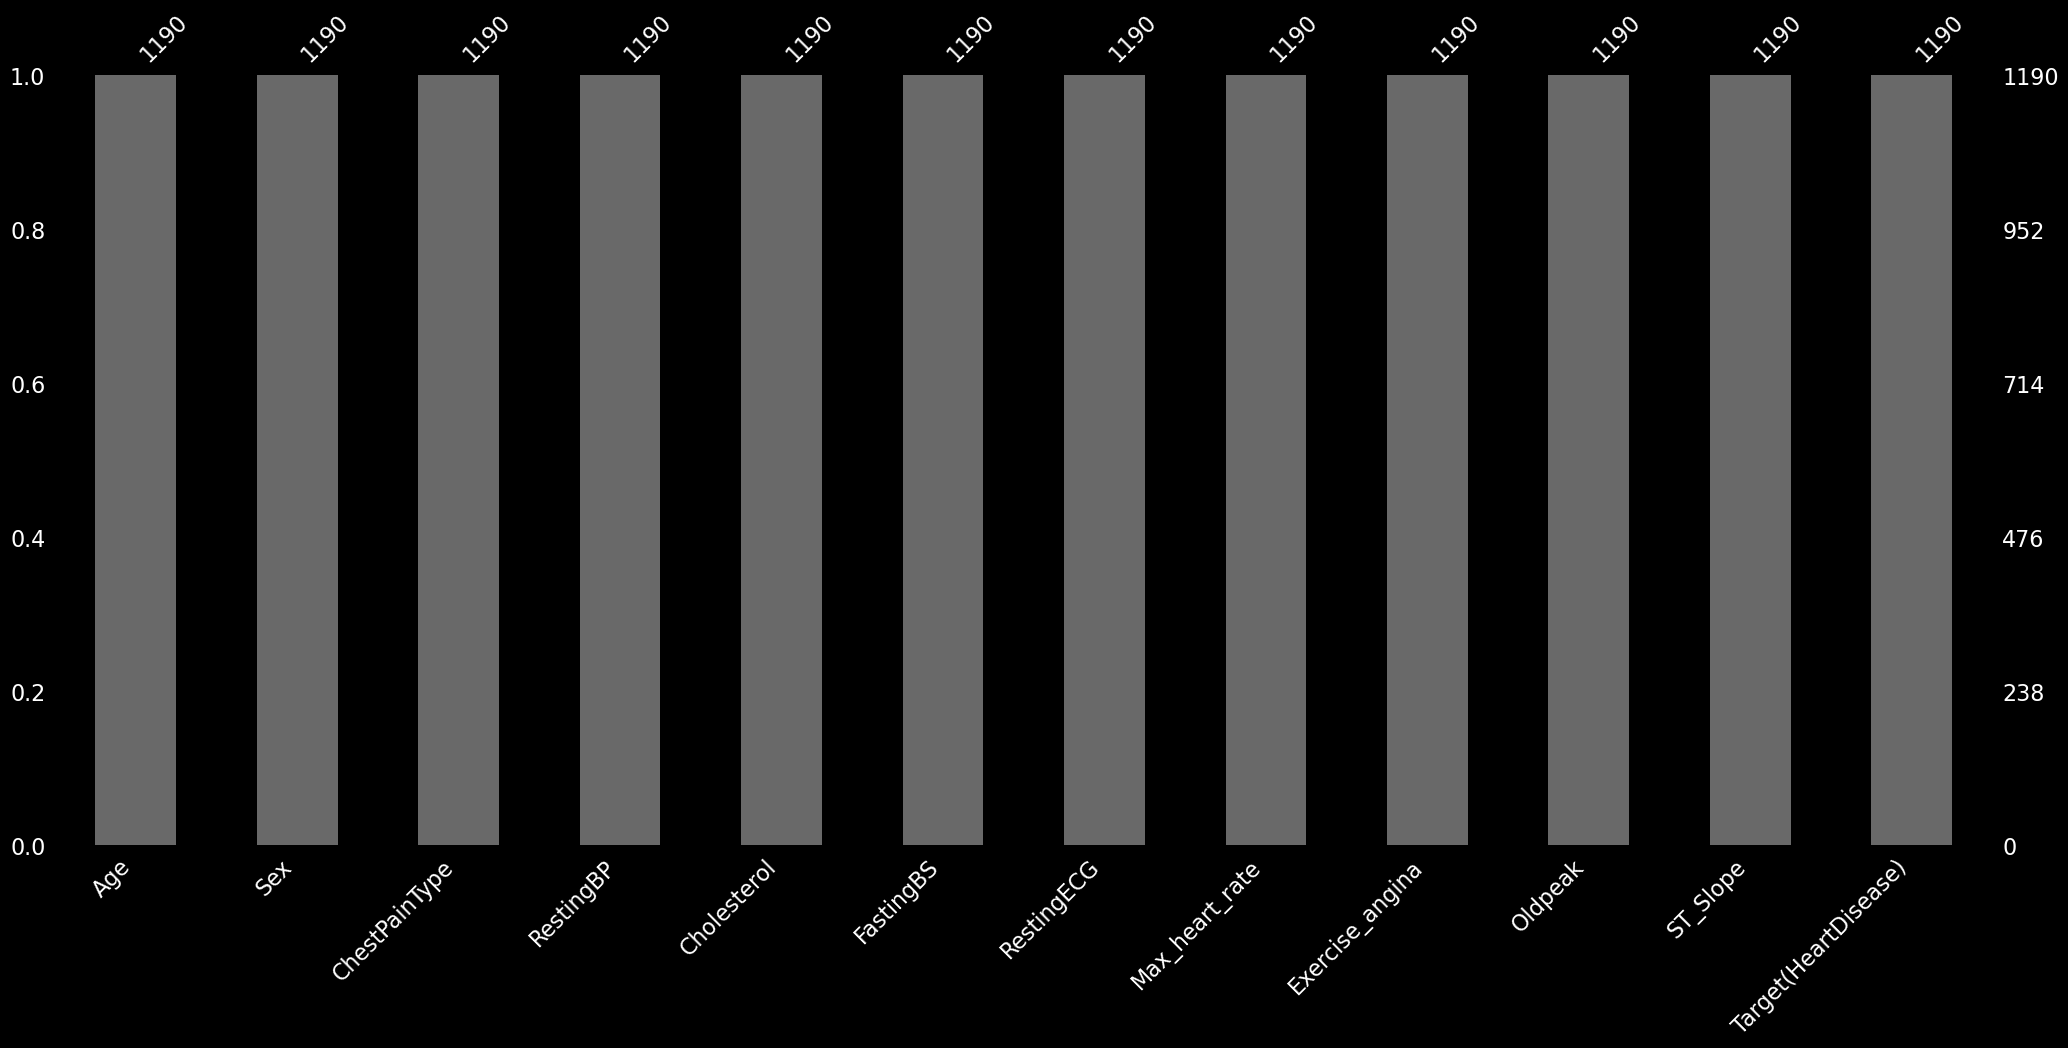

In [6]:
import missingno as msno

print("Tamaño del dataset:", df.size)

msno.bar(df)

Se visualiza que no existen valores nulos.

### **Analizar duplicados**

In [7]:
duplicated = df.duplicated()

print("Valores duplicados:")
print(df[df.duplicated()])

print("Cantidad de duplicados:", duplicated[duplicated == True].size)

df = df[duplicated == False]
print("Shape del dataset con duplicados:", raw_shape)
print("Shape del dataset sin duplicados:", df.shape)

Valores duplicados:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
163    49    0              2        110          208          0           0   
604    58    1              3        150          219          0           1   
887    63    1              1        145          233          1           2   
888    67    1              4        160          286          0           2   
889    67    1              4        120          229          0           2   
...   ...  ...            ...        ...          ...        ...         ...   
1156   42    1              3        130          180          0           0   
1157   61    1              4        140          207          0           2   
1158   66    1              4        160          228          0           2   
1159   46    1              4        140          311          0           0   
1160   71    0              4        112          149          0           0   

      Max_heart_rat

### **Análisis Numérico:**

In [8]:
numeric_columns = ["Age", "RestingBP", "Cholesterol", "Max_heart_rate", "Oldpeak"]

In [9]:
df[numeric_columns].describe()

,Age,RestingBP,Cholesterol,Max_heart_rate,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [10]:
restingbp_error_df = df[df["RestingBP"] <= 0]
cholesterol_error_df = df[df["Cholesterol"] <= 0]
oldpeak_error_df = df[df["Oldpeak"] < 0]

print(f"Incorrect RestingBP data: {restingbp_error_df.shape[0] }. Percentage: {round((restingbp_error_df.shape[0] / df.shape[0]) * 100, 2)}%")
print(f"Incorrect Cholesterol data: {cholesterol_error_df.shape[0]}. Percentage: {round((cholesterol_error_df.shape[0] / df.shape[0]) * 100, 2)}%")
print(f"Incorrect Oldpeak data: {oldpeak_error_df.shape[0]}. Percentage: {round((oldpeak_error_df.shape[0] / df.shape[0]) * 100, 2)}%")

Incorrect RestingBP data: 1. Percentage: 0.11%
Incorrect Cholesterol data: 172. Percentage: 18.74%
Incorrect Oldpeak data: 13. Percentage: 1.42%


In [11]:
df = df[df["RestingBP"] > 0]
df = df[df["Oldpeak"] >= 0]

df_numerico = df[numeric_columns]
df_numerico.shape

(904, 5)

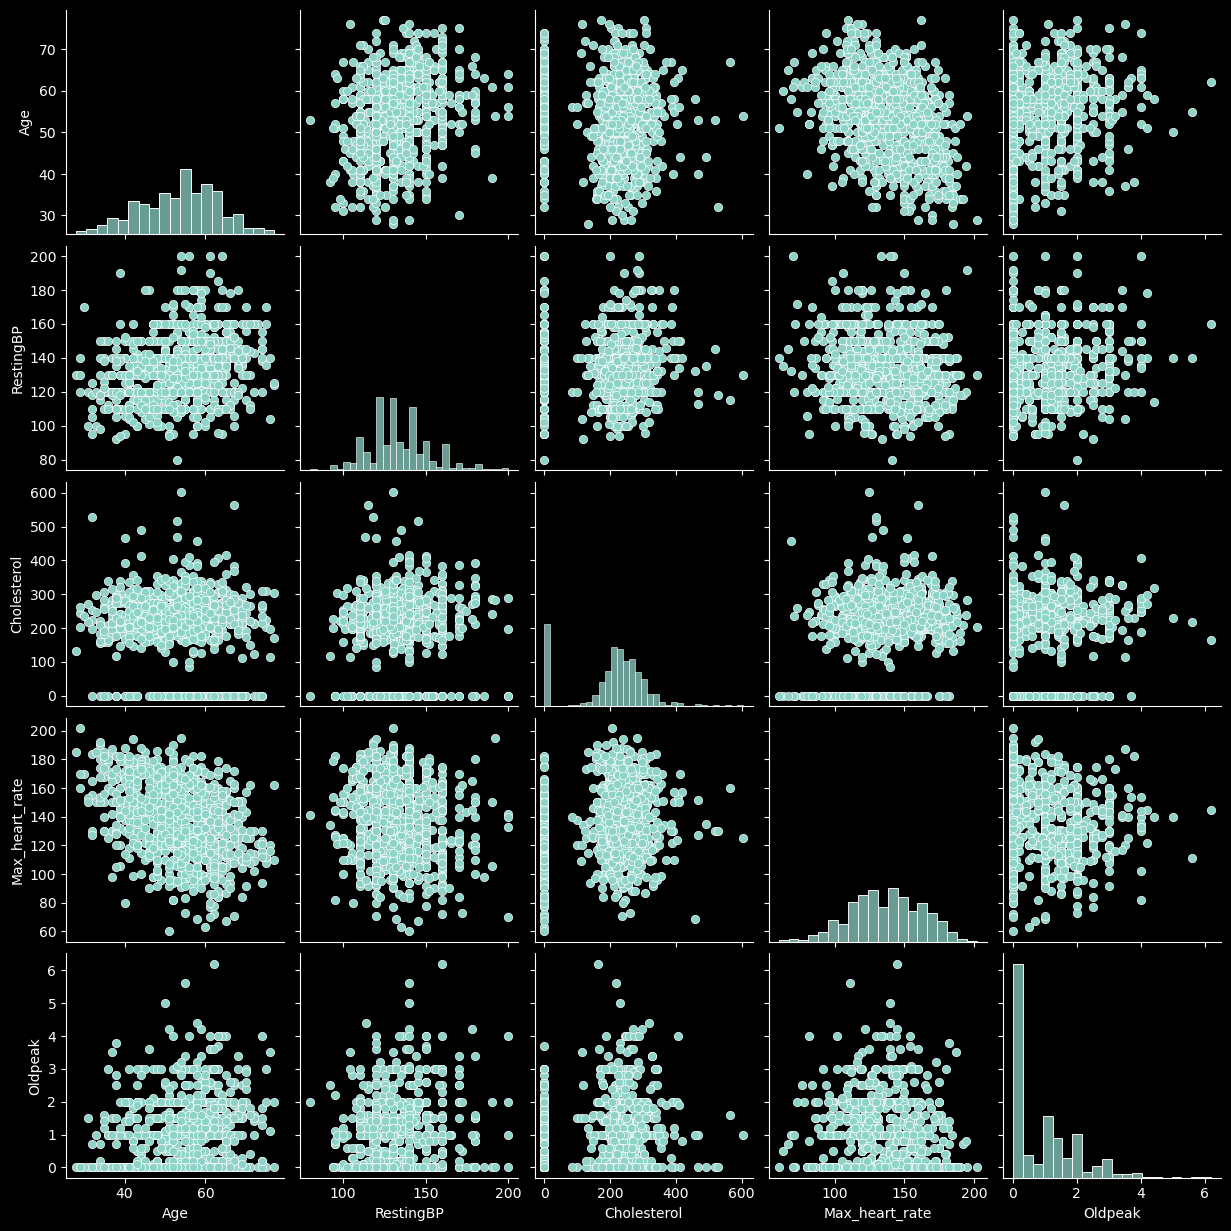

In [12]:
sn.pairplot(df_numerico)

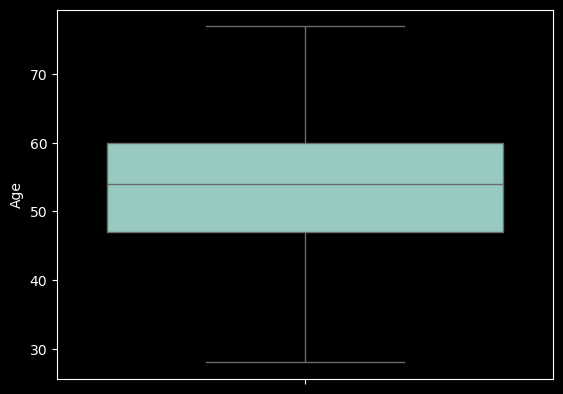

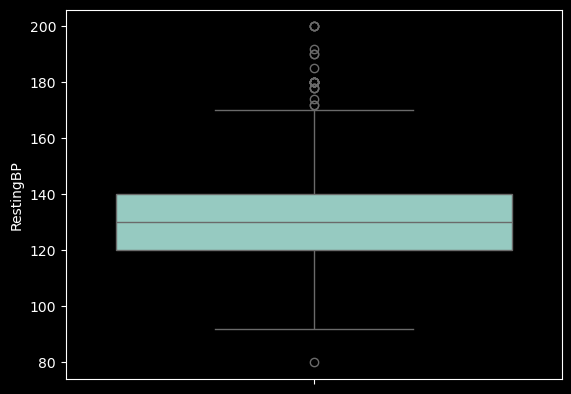

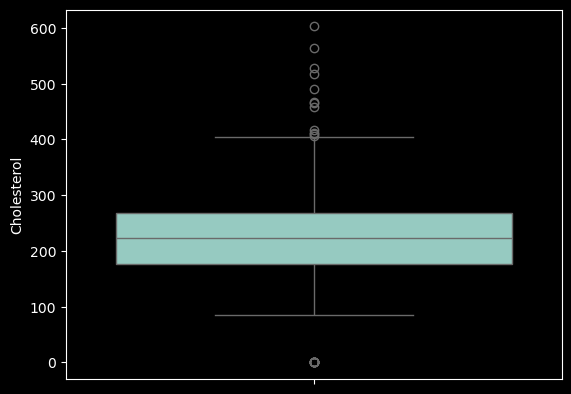

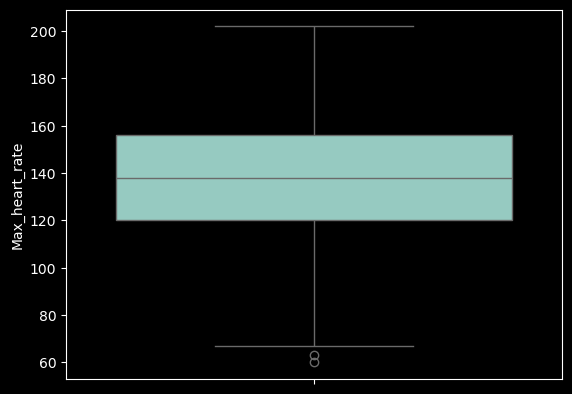

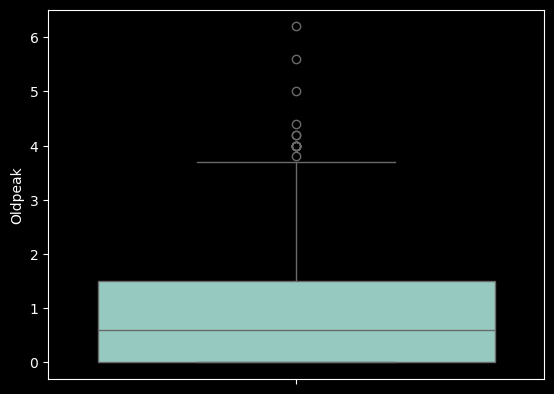

In [13]:
for column_name in numeric_columns:
    sn.boxplot(df[column_name])
    plt.show()

### **Análisis Categorico:**

In [14]:
categorical_columns = df.loc[:, ~df.columns.isin(numeric_columns)].columns

df[categorical_columns] = df[categorical_columns].astype("category")

df[categorical_columns].describe()

,Sex,ChestPainType,FastingBS,RestingECG,Exercise_angina,ST_Slope,Target(HeartDisease)
count,904,904,904,904,904,904,904
unique,2,4,2,3,2,4,2
top,1,4,0,0,0,2,1
freq,711,489,698,544,536,453,498


In [15]:
df["ST_Slope"].unique()

st_slope_error_df = df[df["ST_Slope"] == 0]

print(f"Incorrect RestingBP data: {st_slope_error_df.shape[0] }. Percentage: {round((st_slope_error_df.shape[0] / df.shape[0]) * 100, 2)}%")

Incorrect RestingBP data: 1. Percentage: 0.11%


In [16]:
df = df[df["ST_Slope"] != 0]
df["ST_Slope"] = df["ST_Slope"].cat.remove_unused_categories()

df_categorico = df[categorical_columns]
df_categorico.shape

(903, 7)

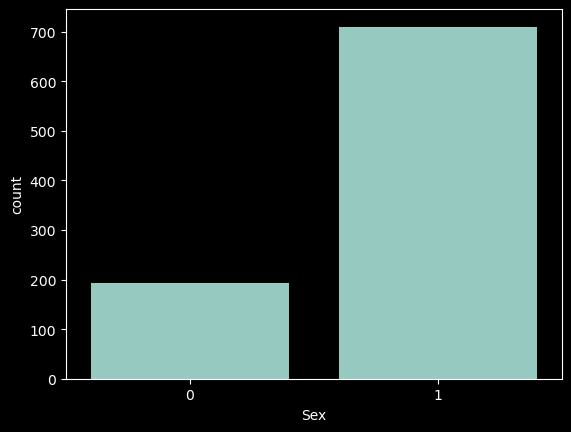

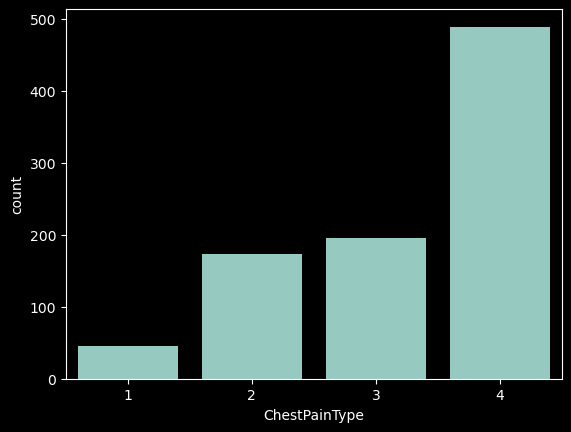

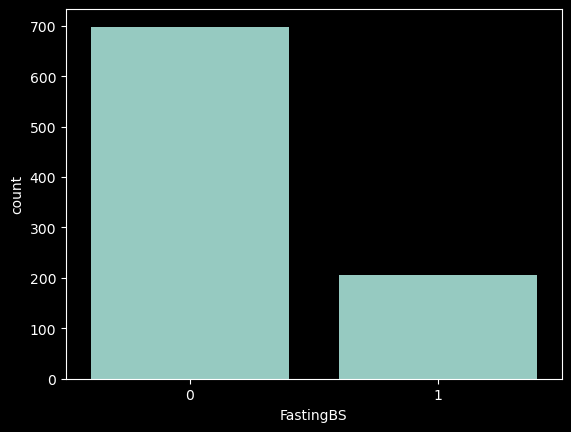

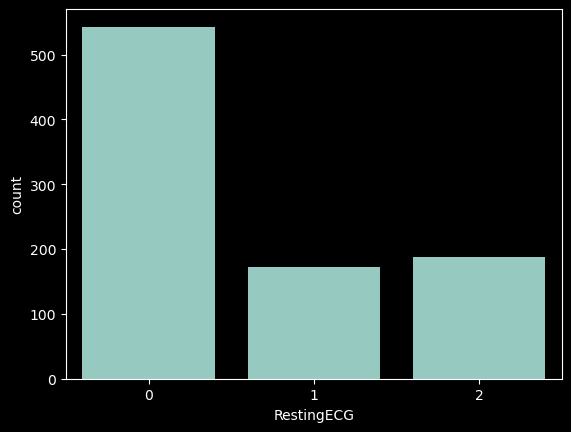

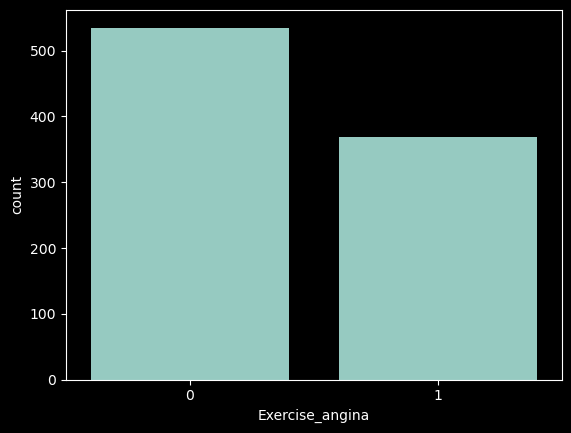

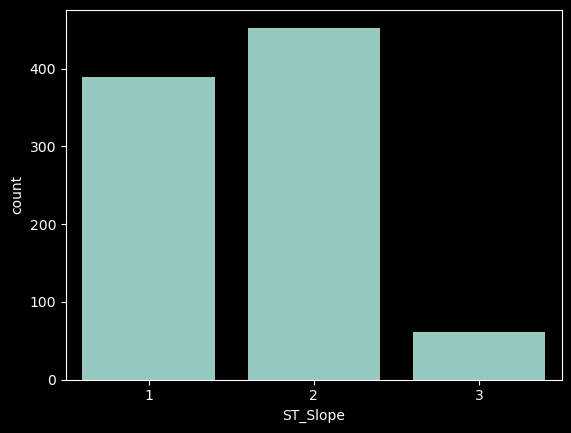

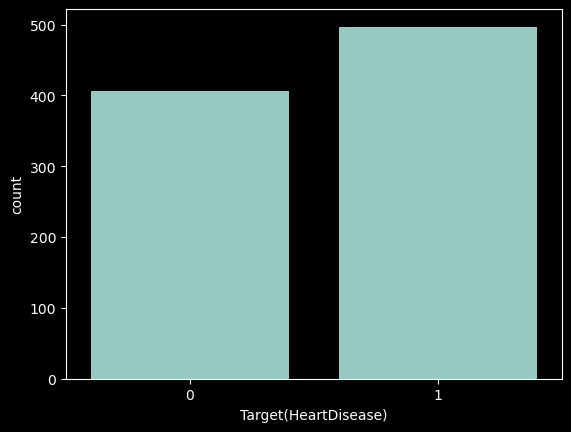

In [17]:
for cc in categorical_columns:
    sn.countplot(df_categorico, x=cc)
    plt.show()

------------------
<!-- 4. Preparación de los Datos (Data Preparation) ⚒️ -->
<a class="anchor"  id="4"></a>
# <font color=RoyalBlue>4- Preparación de los Datos (Data Preparation) ⚒️</font>

## **División en entrenamiento y prueba**

In [18]:
RANDOM_STATE = 123

X = df.drop("Target(HeartDisease)", axis=1, errors='ignore')
y = df["Target(HeartDisease)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## **Tratamiento de Outliers**

In [19]:
df_size, _ = df_numerico.shape
print("Dataset size", df_size)


total_percentage_data_loss = 0
for item in numeric_columns:
    q1 = np.percentile(df_numerico[item], 25)
    q3 = np.percentile(df_numerico[item], 75)

    IRC = q3 - q1
    lingote_inferior = q1 - 1.5 * IRC
    lingote_superior = q3 + 1.5 * IRC

    temp_df = df_numerico
    temp_df = temp_df[lingote_inferior < temp_df[item]]
    temp_df = temp_df[temp_df[item] < lingote_superior]

    temp_df_shape = temp_df.shape
    temp_df_size, _ = temp_df_shape

    percentage_data_loss = round(((df_size - temp_df_size) / df_size) * 100, 2)
    total_percentage_data_loss += percentage_data_loss
    print(
        f"Dataset size without outliers for column {item} : {temp_df_size}. Data loss percentage:  {percentage_data_loss}%"
    )

print(
    f"Total dataset size without outliers: {round(df_size - (df_size * (total_percentage_data_loss / 100)))}. Data loss total percentage: {round(total_percentage_data_loss, 2)}%"
)

Dataset size 904
Dataset size without outliers for column Age : 904. Data loss percentage:  0.0%
Dataset size without outliers for column RestingBP : 863. Data loss percentage:  4.54%
Dataset size without outliers for column Cholesterol : 733. Data loss percentage:  18.92%
Dataset size without outliers for column Max_heart_rate : 902. Data loss percentage:  0.22%
Dataset size without outliers for column Oldpeak : 889. Data loss percentage:  1.66%
Total dataset size without outliers: 675. Data loss total percentage: 25.34%


In [20]:
%pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [21]:
def outlier_multidimension(model, df_numerico):
    df_size, _ = df_numerico.shape
    print("Dataset size", df_size)

    model = model(contamination=0.1)
    model.fit(df_numerico)
    y_predict  = model.predict(df_numerico)

    temp_df_shape = df_numerico[y_predict == 0].shape
    temp_df_size, _ = temp_df_shape

    total_percentage_data_loss = round(((df_size - temp_df_size)/df_size) * 100,2)

    print(
        f"Algorithm: {model}. \nDataset size without outliers: {temp_df_size}. Data loss total percentage: {total_percentage_data_loss}%"
    )
    return temp_df_shape


In [22]:
from pyod.models.knn import KNN
outlier_multidimension(KNN, df)

Dataset size 903
Algorithm: KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0). 
Dataset size without outliers: 830. Data loss total percentage: 8.08%


(830, 12)

In [23]:
from pyod.models.iforest import IForest
outlier_multidimension(IForest, df_numerico)

Dataset size 904
Algorithm: IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0). 
Dataset size without outliers: 813. Data loss total percentage: 10.07%


(813, 5)

In [24]:
from pyod.models.abod import ABOD
outlier_multidimension(ABOD, df_numerico)

Dataset size 904
Algorithm: ABOD(contamination=0.1, method='fast', n_neighbors=5). 
Dataset size without outliers: 807. Data loss total percentage: 10.73%


(807, 5)

In [25]:
from pyod.models.pca import PCA as PyodPCA
outlier_multidimension(PyodPCA, df_numerico)

Dataset size 904
Algorithm: PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False). 
Dataset size without outliers: 813. Data loss total percentage: 10.07%


(813, 5)

In [26]:
from pyod.models.ecod import ECOD
outlier_multidimension(ECOD, df_numerico)

Dataset size 904
Algorithm: ECOD(contamination=0.1, n_jobs=1). 
Dataset size without outliers: 813. Data loss total percentage: 10.07%


(813, 5)

## **Transformación y/o Escalamiento**

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ("scale", StandardScaler(), numeric_columns),
    ("ordinal", OrdinalEncoder(), ["ST_Slope"]),
    ("onehot", OneHotEncoder(), ["Sex", "ChestPainType", "FastingBS", "RestingECG", "Exercise_angina"]),
])

preprocesador.fit(X_train)

X_train_tr = preprocesador.transform(X_train)
X_test_tr = preprocesador.transform(X_test)

column_named_tr = preprocesador.named_transformers_["onehot"].get_feature_names_out().tolist()
X_train_tr = pd.DataFrame(X_train_tr, columns=numeric_columns + column_named_tr + ["Target(HeartDisease)"])
X_test_tr = pd.DataFrame(X_test_tr, columns=numeric_columns + column_named_tr + ["Target(HeartDisease)"])

X_train_tr

,Age,RestingBP,Cholesterol,Max_heart_rate,Oldpeak,Sex_0,Sex_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,ChestPainType_4,FastingBS_0,FastingBS_1,RestingECG_0,RestingECG_1,RestingECG_2,Exercise_angina_0,Exercise_angina_1,Target(HeartDisease)
0,0.162939,0.397323,-0.011749,-0.280701,1.903859,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.046762,-2.951976,-1.908373,0.162417,0.970734,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-2.353473,-1.835543,0.158098,0.524968,-0.895515,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.162939,0.397323,0.875229,-0.039000,-0.895515,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.267790,-0.719110,-0.087237,1.008369,0.877422,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.267790,-0.719110,-1.106318,0.122134,-0.895515,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
718,0.896893,-0.998218,-1.908373,-0.361268,1.437296,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
719,1.735697,-0.998218,-1.908373,-1.811471,-0.895515,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
720,0.792043,-0.440002,-1.908373,-1.287787,-0.895515,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


--------------------------------------------------------
<!-- 5. Modelado (Modeling) 🧠 -->
<a class="anchor"  id="5"></a>
# <font color=RoyalBlue>5- Modelado (Modeling) 🧠</font>

## **Seleccionando variables**

In [28]:
from sklearn.decomposition import PCA

def apply_pca(X_train, X_test):

    print(f"Original train shape {X_train.shape}")
    print(f"Original test shape {X_test.shape}")

    pca = PCA(n_components=0.95)
    X_train_tr = pca.fit_transform(X_train)
    X_test_tr = pca.transform(X_test)

    print(f"Transformed train shape {X_train_tr.shape}")
    print(f"Transformed test shape {X_test_tr.shape}")

    return X_train_tr, X_test_tr

In [29]:
X_train_pca , y_train_pca = apply_pca(X_train_tr, X_test_tr)

Original train shape (722, 19)
Original test shape (181, 19)
Transformed train shape (722, 12)
Transformed test shape (181, 12)


## **Balance de datos**

# **Algoritmos de clasificacion**

Comparar diferentes algoritmos de clasificacion y estimar el mejor.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    "C": [0.1, 1, 10, 100],
    "kernel":["rbf", "poly"],
    "gamma":['scale', 'auto']
}

grid_search = GridSearchCV(estimator = SVC(random_state = RANDOM_STATE),
                           param_grid=params,
                           cv = 5, verbose=2
                           )

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

GridSearchCV(cv=5, estimator=SVC(random_state=123),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [33]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        86
           1       0.87      0.86      0.87        95

    accuracy                           0.86       181
   macro avg       0.86      0.86      0.86       181
weighted avg       0.86      0.86      0.86       181



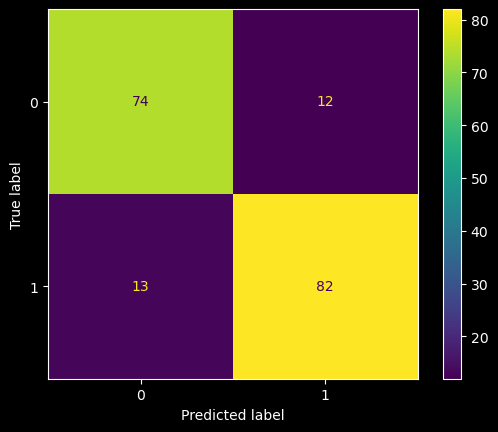

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


model = SVC(**grid_search.best_params_)
model.fit(X_train_tr, y_train)
y_pred = model.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(50, 700, 50)]

max_features = ['auto', 'sqrt', None, "log2"]

max_depth = [int(x) for x in np.arange(5, 20, 5)]
min_samples_leaf = [5, 10, 15]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               }

RF_model = RandomForestClassifier()
rf_random = RandomizedSearchCV(
                estimator = RF_model,
                param_distributions = random_grid,
                n_iter = 100,
                cv = 3,
                verbose=2,
                random_state=RANDOM_STATE,
                n_jobs = -1)
rf_random.fit(X_train_tr, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650]},
                   random_state=123, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 15}

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        86
           1       0.84      0.92      0.88        95

    accuracy                           0.87       181
   macro avg       0.87      0.86      0.87       181
weighted avg       0.87      0.87      0.87       181



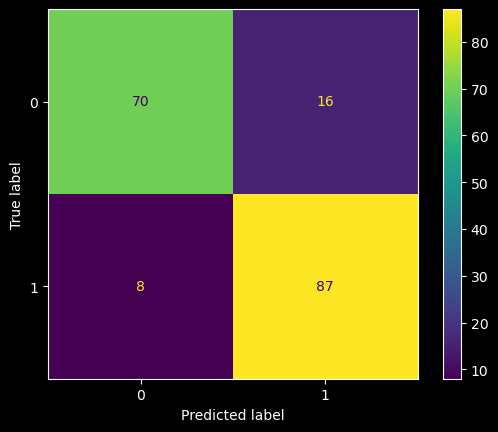

In [40]:
rfc = RandomForestClassifier(**rf_random.best_params_)
rfc.fit(X_train_tr, y_train)
y_pred = rfc.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))

In [42]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   --- ----------------------------------- 14.7/150.0 MB 103.0 MB/s eta 0:00:02
   --- ----------------------------------- 14.7/150.0 MB 103.0 MB/s eta 0:00:02
   ------- -------------------------------- 26.7/150.0 MB 43.5 MB/s eta 0:00:03
   ----------- ---------------------------- 41.9/150.0 MB 51.3 MB/s eta 0:00:03
   ----------------- ---------------------- 65.5/150.0 MB 64.3 MB/s eta 0:00:02
   ------------------ --------------------- 70.3/150.0 MB 66.9 MB/s eta 0:00:02
   ------------------- -------------------- 71.3/150.0 MB 50.0 MB/s eta 0:00:02
   ------------------------ --------------- 91.2/150.0 MB 57.6 MB/s eta 0:00:02
   --------------------------- ----------- 107.0/150.0 MB 59.4 MB/s eta 0:00:01
   --------------------------- ----------- 107.0/150.0 MB 59.4 MB/s eta 0:00:01
   ------------------------------- ------- 120.3/150.0 MB 54.1 MB/s eta 0:00:01
   ------------------------------------- - 142.6/

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(50, 500, 10)]
max_features = ['auto', 'sqrt', None, "log2"]
max_depth = [int(x) for x in np.arange(5, 100, 5)]
min_samples_leaf = [5, 10, 15]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               }

XGB_model = XGBClassifier()
rf_random = RandomizedSearchCV(
                estimator = XGB_model,
                param_distributions = random_grid,
                n_iter = 20,
                cv = 3,
                verbose=2,
                random_state=RANDOM_STATE,
                n_jobs = -1)
rf_random.fit(X_train_tr, y_train)



Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240, 250,
                                                         260, 270, 280, 290,
                                                         300, 310, 320, 330,
                                                         340, ...]},
                   random_state=123, verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 450,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 35}

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        86
           1       0.83      0.87      0.85        95

    accuracy                           0.84       181
   macro avg       0.84      0.84      0.84       181
weighted avg       0.84      0.84      0.84       181



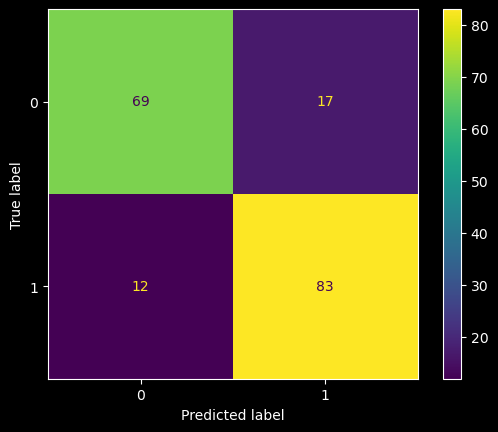

In [47]:
cxgb = XGBClassifier(**rf_random.best_params_)
cxgb.fit(X_train_tr, y_train)
y_pred = cxgb.predict(X_test_tr)
conf_mat=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,y_pred))